<a href="https://colab.research.google.com/github/chaitu2568/DEEP-LEARNING/blob/master/Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip3 install torch

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
n_points=500
X,y=datasets.make_circles(n_samples=n_points, random_state=123, noise=0.1, factor=0.4)
x_data=torch.Tensor(X)
y_data=torch.Tensor(y.reshape(500,1))

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0],X[y==0,1])
  plt.scatter(X[y==1, 0],X[y==1,1])

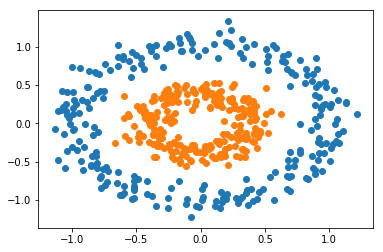

In [76]:
scatter_plot()

In [0]:
class DNN(nn.Module):
  def __init__(self,input,h1,output):
#     one Hidden layer
    super().__init__()
    self.linear=nn.Linear(input,h1)
    self.linear_two=nn.Linear(h1,output)
    
  def forward(self,x):
    x=torch.sigmoid(self.linear(x))
    x=torch.sigmoid(self.linear_two(x))
    return x
  def predict(self,x):
    if self.forward(x)>0.5:
      return 1
    else:
      return 0
  

In [0]:
torch.manual_seed(2)
obj=DNN(2,5,1)


In [0]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(obj.parameters(),lr=0.1)

In [80]:
iterations=1000
losses=[]
for i in range(iterations):
  y_pred=obj.forward(x_data)
  loss=criterion(y_pred,y_data)
  print('Iteration:',i,'Loss:',loss.item())
  losses.append(loss) 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Iteration: 0 Loss: 0.7013503313064575
Iteration: 1 Loss: 0.695449709892273
Iteration: 2 Loss: 0.6993554830551147
Iteration: 3 Loss: 0.6947042942047119
Iteration: 4 Loss: 0.692756712436676
Iteration: 5 Loss: 0.6948404908180237
Iteration: 6 Loss: 0.6954957842826843
Iteration: 7 Loss: 0.6935285329818726
Iteration: 8 Loss: 0.6916376948356628
Iteration: 9 Loss: 0.6914913058280945
Iteration: 10 Loss: 0.6919785141944885
Iteration: 11 Loss: 0.6912564039230347
Iteration: 12 Loss: 0.6892512440681458
Iteration: 13 Loss: 0.6871498823165894
Iteration: 14 Loss: 0.6856309175491333
Iteration: 15 Loss: 0.6841270923614502
Iteration: 16 Loss: 0.6816706657409668
Iteration: 17 Loss: 0.6780562400817871
Iteration: 18 Loss: 0.6738320589065552
Iteration: 19 Loss: 0.6694719791412354
Iteration: 20 Loss: 0.6648059487342834
Iteration: 21 Loss: 0.6592929363250732
Iteration: 22 Loss: 0.65272057056427
Iteration: 23 Loss: 0.6454153656959534
Iteration: 24 Loss: 0.6377831101417542
Iteration: 25 Loss: 0.6298310160636902


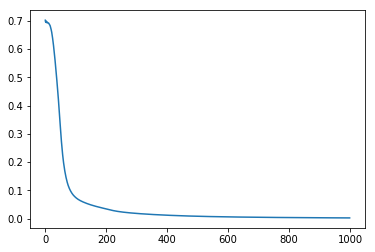

In [81]:
plt.plot(range(iterations),losses)
plt.show()

In [0]:
def plot_nonlinear_boundary(X,y):
  x_axis=np.linspace(min(X[:,0]-0.3),max(X[:,0]+0.3))
  y_axis=np.linspace(min(X[:,1]-0.3),max(X[:,1]+0.3))
  xx,yy=np.meshgrid(x_axis,y_axis)
#   ravel function flattens into one dimensional array
  grid=torch.Tensor(np.c_[xx.ravel(),yy.ravel()])
  pred_fun=obj.forward(grid)
  zz=pred_fun.view(xx.shape).detach().numpy()
  plt.contourf(xx,yy,zz)

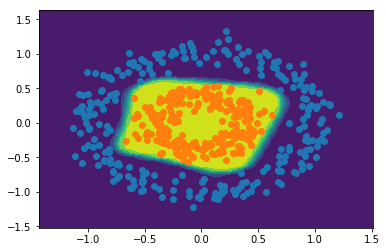

In [83]:
plot_nonlinear_boundary(X,y)
scatter_plot()

decison boundary is: 1


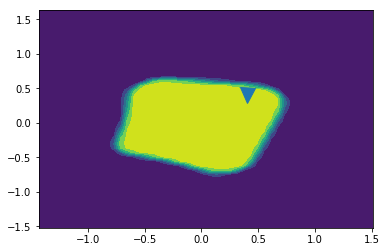

In [84]:
x=0.4
y=0.4
test=torch.Tensor([x,y])
boundary=obj.predict(test)
plt.plot([x],[y],marker='v',markersize=15)
print("decison boundary is:",boundary)
plot_nonlinear_boundary(X,y)
scatter_plot()